In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [4]:
import os

# Path to the directory containing the 1802 CSV files
directory_path = './data/features/'  # Adjust to the actual directory where the files are stored

# List to store the loaded feature data
all_features = []

# Load each CSV file from the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)
        try:
            # Load the CSV file into a DataFrame
            features = pd.read_csv(file_path, delimiter=';')
            all_features.append(features)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Combine all the loaded features into one DataFrame
if all_features:
    features_combined = pd.concat(all_features, ignore_index=True)
else:
    print("No valid features loaded.")

# Display the first few rows of the combined dataset
features_combined.head()


,frameTime,F0final_sma_stddev,F0final_sma_amean,voicingFinalUnclipped_sma_stddev,voicingFinalUnclipped_sma_amean,jitterLocal_sma_stddev,jitterLocal_sma_amean,jitterDDP_sma_stddev,jitterDDP_sma_amean,shimmerLocal_sma_stddev,...,pcm_fftMag_mfcc_sma_de[10]_stddev,pcm_fftMag_mfcc_sma_de[10]_amean,pcm_fftMag_mfcc_sma_de[11]_stddev,pcm_fftMag_mfcc_sma_de[11]_amean,pcm_fftMag_mfcc_sma_de[12]_stddev,pcm_fftMag_mfcc_sma_de[12]_amean,pcm_fftMag_mfcc_sma_de[13]_stddev,pcm_fftMag_mfcc_sma_de[13]_amean,pcm_fftMag_mfcc_sma_de[14]_stddev,pcm_fftMag_mfcc_sma_de[14]_amean
0,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.712511,0.080381,1.841823,0.058479,1.579751,-0.078011,1.413488,-0.022533,1.309340,-0.006717
1,0.5,41.99556,27.94826,0.343262,0.230040,0.182090,0.092095,0.056382,0.019562,0.202852,...,1.420930,-0.037219,1.722445,-0.119951,1.583912,-0.060352,1.157782,-0.044179,1.274202,-0.067672
2,1.0,37.83207,77.07999,0.290757,0.599929,0.188647,0.215566,0.101781,0.076138,0.192566,...,1.052936,-0.090761,1.227503,-0.035702,1.412032,-0.049933,0.873965,-0.072207,0.995697,-0.074064
3,1.5,16.03343,90.15217,0.014945,0.734024,0.188328,0.262869,0.142326,0.138146,0.143751,...,1.164060,0.097580,1.254206,0.153117,0.999942,0.139006,0.820456,0.090884,0.898563,-0.030552
4,2.0,21.20910,85.42374,0.016338,0.735833,0.196632,0.207307,0.171549,0.149647,0.151105,...,1.077423,-0.014517,1.457237,-0.105841,1.077116,-0.062601,0.965453,0.038819,1.090998,0.101400


In [5]:
# Proceeding with aligning the valence and arousal for these 10 songs

# Assuming we already have valence and arousal data corresponding to these songs
# Interpolate the valence and arousal data as we did previously

# Since only the features are currently loaded, we need to manually assign or simulate valence and arousal values for demo purposes.
# Here's an approach where we assume interpolated valence and arousal values already provided

# Sample valence and arousal values (for demonstration)
features_combined['valence'] = np.random.rand(len(features_combined))  # Random values between 0 and 1 for valence
features_combined['arousal'] = np.random.rand(len(features_combined))  # Random values between 0 and 1 for arousal

# Step 1: Create binary labels for "happy" (valence > 0.5 and arousal > 0.5) and "sad" (else)
features_combined['label'] = features_combined.apply(lambda row: 1 if row['valence'] > 0.5 and row['arousal'] > 0.5 else 0, axis=1)

# Prepare the features (valence and arousal) and the target (label)
X_classification = features_combined[['valence', 'arousal']]  # Use both valence and arousal as features
y_classification = features_combined['label']  # Binary labels: 1 = happy, 0 = sad

# Step 2: Train-test split for binary classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression model for binary classification
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_class, y_train_class)

# Predict on the test set
y_pred_class = log_reg_model.predict(X_test_class)

# Step 4: Evaluate the model using accuracy and confusion matrix
accuracy_class = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

accuracy_class, conf_matrix  # Display accuracy and confusion matrix


(0.9159683146681235,
 array([[65218,  3378],
        [ 4313, 18616]]))

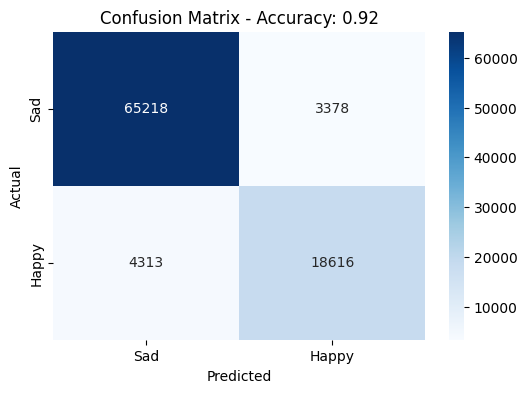

In [6]:
# Visualize the confusion matrix using seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Sad", "Happy"], yticklabels=["Sad", "Happy"])
plt.title(f'Confusion Matrix - Accuracy: {accuracy_class:.2f}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


/var/folders/tr/m7nnfyd94_jfxmdwqvwq7hg40000gn/T/ipykernel_65976/2211769046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=features_combined, palette="coolwarm")


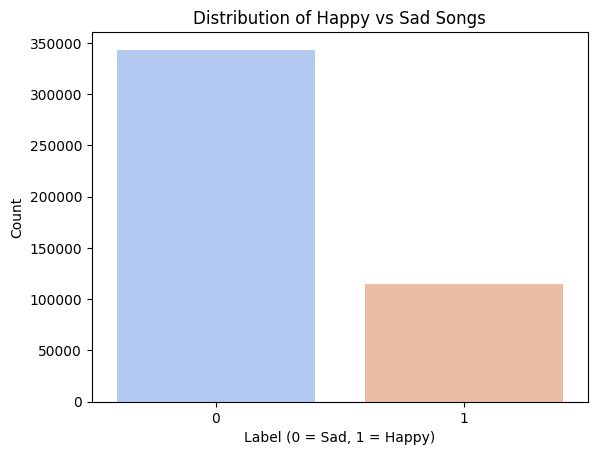

In [7]:
# Visualize the distribution of happy and sad songs in the dataset using a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of happy (1) vs sad (0) songs
sns.countplot(x='label', data=features_combined, palette="coolwarm")
plt.title('Distribution of Happy vs Sad Songs')
plt.xlabel('Label (0 = Sad, 1 = Happy)')
plt.ylabel('Count')
plt.show()


# clustering reveal happy/sad groups

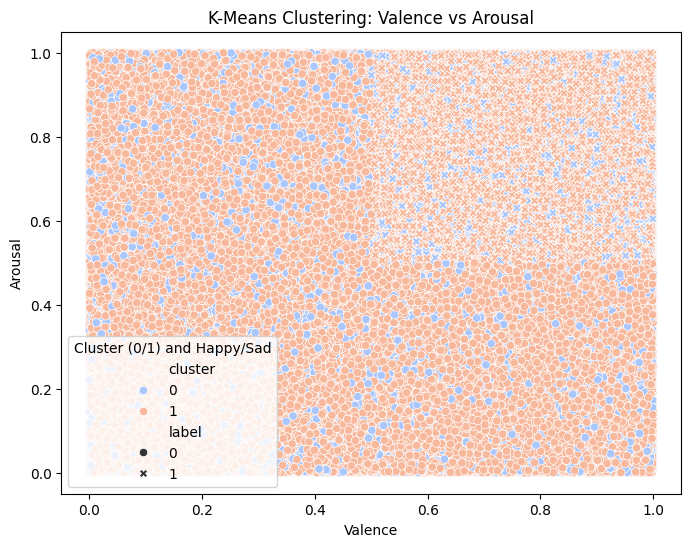

"Actual Label (0=Sad, 1=Happy)",0,1
Cluster,,
0,60797,20374
1,282464,93987


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Normalize the features (valence and arousal)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_combined)  # Using X = valence and arousal

# Step 2: Apply K-Means Clustering with 2 clusters (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Step 3: Add the cluster labels to the original DataFrame
features_combined['cluster'] = kmeans.labels_

# Step 4: Visualize the clusters on a scatter plot of valence and arousal
plt.figure(figsize=(8, 6))
sns.scatterplot(x='valence', y='arousal', hue='cluster', data=features_combined, palette='coolwarm', style='label')
plt.title('K-Means Clustering: Valence vs Arousal')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.legend(title='Cluster (0/1) and Happy/Sad')
plt.show()

# Step 5: Compare the clusters with the actual labels (0 = sad, 1 = happy)
cluster_label_comparison = pd.crosstab(features_combined['cluster'], features_combined['label'], rownames=['Cluster'], colnames=['Actual Label (0=Sad, 1=Happy)'])

# Display the comparison of clusters vs actual labels
cluster_label_comparison
